### The dataset contains data about courses offered by the online learning and teaching marketplace Udemy. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
#import plotly.offline as py
from plotly.offline import iplot
#from plotly.subplots import make_subplots
#import plotly.figure_factory as ff

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('data/udemy_courses.csv')

#### Basic info about the data

In [3]:
df.head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

In [4]:
df.shape

(3678, 12)

In [5]:
# check for duplicates

df.duplicated().sum()

6

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 347.8+ KB


In [8]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
df.describe().drop('course_id', axis = 1) # drop 'course_id' from the describe method result as it gives meaningless info

price  num_subscribers   num_reviews  num_lectures  \
count  3672.000000      3672.000000   3672.000000   3672.000000   
mean     66.102941      3190.586874    156.371460     40.140251   
std      61.035920      9488.105448    936.178649     50.417102   
min       0.000000         0.000000      0.000000      0.000000   
25%      20.000000       111.750000      4.000000     15.000000   
50%      45.000000       912.000000     18.000000     25.000000   
75%      95.000000      2548.750000     67.000000     46.000000   
max     200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3672.000000  
mean           4.097603  
std            6.057830  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

#### Data cleanning

In [10]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [11]:
# creating a datetime object column out of the published_data column which is an object 

df['published_date'] = pd.to_datetime(df['published_timestamp'])

In [12]:
# course_id and url won't be used in my analysis. I will drop both
# I will also drop the published_timestamp

df.drop(['course_id', 'url', 'published_timestamp'], axis = 1, inplace = True)

#### Data Analysis

In [13]:
# some questions to answer

# 1. what are the learning paths Udemy offering courses for
# 2. which path has the most number of courses
# 3. how many courses are Free and how many are paid, which of these 2 people are subscribing to.
# 4. find the number of paid courses and free courses by subject.
# 5. find top 10 most bought(subscribed to) courses.
# 6. find the least selling courses
# 7. check the distripution of the courses prises. 
# 8. check the distripution of the courses duration.
# 9. how many course offering the Python programming language 
# 10. find the number of offered courses by year. 
# 11. find the number of offered courses by leve. 
# 12. find the average number of subscribers for each level by subject.
# 13. check which subject has the highest average subscribers for 'Expert level'
# 14. find the average course duration by subject
# 15. does content_duration affects the price

In [14]:
# answering question number 1.

df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [15]:
# answering question number 2.

display(df['subject'].value_counts())

display(round(df['subject'].value_counts(normalize = True) * 100, 2))

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

Web Development        32.65
Business Finance       32.43
Musical Instruments    18.52
Graphic Design         16.39
Name: subject, dtype: float64

In [16]:
px.histogram(df, x = 'subject', title = 'Number of offered courses by subject', height = 600, width = 600)

In [17]:
# answering question number 3.

#df['is_paid'].unique()                

df[df['is_paid'] == False]

num_free_courses = df["is_paid"].value_counts()[0]
num_free_courses

print('number of free courses offered by Udemy are: {}'.format(num_free_courses))

number of free courses offered by Udemy are: 310


In [18]:
free_or_not = pd.DataFrame(df["is_paid"].value_counts().reset_index())

px.pie(free_or_not, values = "is_paid", names = free_or_not["index"], 
       title = "Percentage of Paid vs Free courses",
       width=400, height=400)

In [19]:
udemy_groupby_paid = df.sort_values(by = 'num_subscribers', ascending = False).groupby('is_paid')
avg_subscription_rate = udemy_groupby_paid['num_subscribers'].agg('mean')

px.bar(avg_subscription_rate, y = 'num_subscribers', 
       title = 'The average number of subscribers for Paid vs Free courses',  
       width=500, height=600)

In [20]:
# answering question number 4.

display(pd.crosstab(df['subject'], df['is_paid']))

pd.crosstab(df['subject'], df['is_paid']).iplot(kind = 'bar', theme = 'white', 
                                                title = 'Number of paid vs free courses by subject',
                                                xTitle='Subject', yTitle='Number of courses')


is_paid              False  True 
subject                          
Business Finance        96   1095
Graphic Design          35    567
Musical Instruments     46    634
Web Development        133   1066

In [21]:
#top10_subscribed_course = df.sort_values(by = 'num_subscribers', ascending = False)[:10]

#px.bar(top10_subscribed_course, y = 'course_title', x = 'num_subscribers',
#       title = 'Top 10 subscribed to courses')

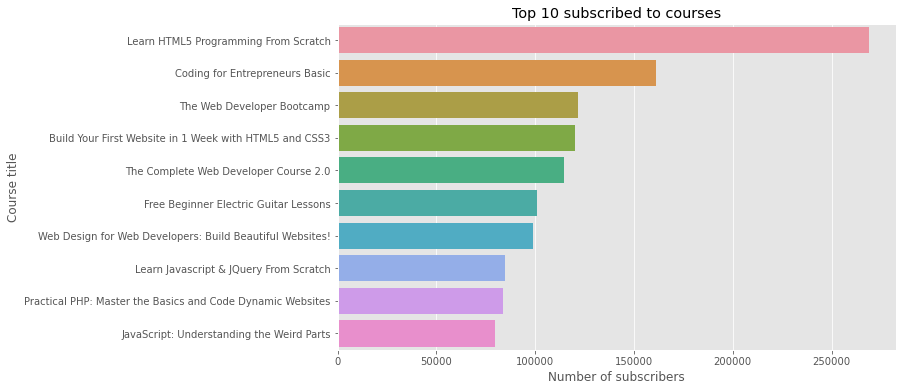

In [22]:
# answering question number 5.

top10_subscribed_course = df.sort_values(by = 'num_subscribers', ascending = False)[:10]

figure = plt.figure(figsize=(10,6))
sns.barplot(y = top10_subscribed_course['course_title'], x = top10_subscribed_course['num_subscribers'])
plt.xticks()
plt.xlabel('Number of subscribers')
plt.ylabel('Course title')
plt.title('Top 10 subscribed to courses')
plt.show()

In [23]:
# answering question number 6.

less_selling_courses = df.sort_values(by = 'num_subscribers', ascending = True)[:10]

less_selling_courses['course_title']


458                   Financial Statement Auditing Cycles
2400    Coaching Course: Rhythm Instruction for Music ...
2401                                4 Week Rhythm Mastery
1236         Como Criar Logos de Sucesso - Start Designer
1237                           Super Textos con Photoshop
1238           Photoshop - Aprende a Transformar Im√°genes
1102     Understand Core Finance Principles in 60 Minutes
2399    Learn Pirates of the Caribbean by Ear on the P...
1101                    Core Financial Statement Concepts
2402                    Tune that Sour Note on Your Piano
Name: course_title, dtype: object

In [24]:
# answering question number 7.

px.histogram(df, x = 'price', marginal = 'box', title = 'Price of Udemy Courses')

##### From both the boxplot and the histogram above, its clear that the prices of the courses offered by Udemy has a right skewed distribution.

In [25]:
# answering question number 8.

px.histogram(df, x = "content_duration", marginal = "box", title = "Durations of UDEMY Courses", 
            labels = {'content_duration':'Course duration in hours', 'count':'count'})

##### From both the boxplot and the histogram above, it's clear that the duration of the courses offered by Udemy has a right-skewed distribution 50% of all courses offered by Udemy has a duration of 2 hours.

In [26]:
# answering question number 9.

search_for = ['python', 'Python']

len(df[df['course_title'].str.contains('|'.join(search_for))])

29

In [27]:
df['published_date'].dt.year

0       2017
1       2017
2       2016
3       2017
4       2016
        ... 
3673    2016
3674    2017
3675    2015
3676    2016
3677    2014
Name: published_date, Length: 3672, dtype: int64

In [28]:
# answering question number 10.

df['year'] = df['published_date'].dt.year

display(pd.crosstab(df['year'], df['subject']))

pd.crosstab(df['year'], df['subject']).iplot(kind = 'scatter', theme = 'white', 
                                                title = 'Number of courses offered each year by subject ',
                                                xTitle='Year', yTitle='Number of courses')



subject  Business Finance  Graphic Design  Musical Instruments  \
year                                                             
2011                    0               0                    0   
2012                    6              10                   10   
2013                   84              23                   39   
2014                  192              65                  120   
2015                  339             168                  171   
2016                  347             181                  228   
2017                  223             155                  112   

subject  Web Development  
year                      
2011                   5  
2012                  19  
2013                  55  
2014                 113  
2015                 336  
2016                 448  
2017                 223

#### From the above graph, it's clear that the number of offered courses in all subjects were at its top in 2016, and it's also clear that towards 2017 the number of the offered courses got decreased.

In [29]:
# answering question number 11.

display(pd.crosstab(df['level'], df['subject']))

pd.crosstab(df['level'], df['subject']).iplot(kind = 'scatter', theme = 'white', 
                                                title = 'Number of courses offered by Level in each subject ',
                                                xTitle='Level', yTitle='Number of courses')

subject             Business Finance  Graphic Design  Musical Instruments  \
level                                                                       
All Levels                       693             298                  276   
Beginner Level                   339             242                  296   
Expert Level                      31               5                    7   
Intermediate Level               128              57                  101   

subject             Web Development  
level                                
All Levels                      658  
Beginner Level                  391  
Expert Level                     15  
Intermediate Level              135

#### From the above graph, it's obvious that the majority of courses offered on Udemy are for all levels, in the second place comes courses offered for 'New beginners' after that comes courses meant for 'Intermediate level' and just a few courses are labeled as course with 'Expert level'.

In [30]:
df.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'subject',
       'published_date', 'year'],
      dtype='object')

In [31]:
df.groupby('level')['num_subscribers'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

In [32]:
# answering question 12.

np.round(df[['subject', 'level', 'num_subscribers']].pivot_table(index = 'subject', columns = 'level', 
                                                                 aggfunc = 'mean'), 2)

num_subscribers                              \
level                    All Levels Beginner Level Expert Level   
subject                                                           
Business Finance            1511.12        1908.58       972.45   
Graphic Design              2309.84        1304.78       201.60   
Musical Instruments         1189.02        1449.43       775.86   
Web Development             7307.11        6803.19       907.40   

                                        
level               Intermediate Level  
subject                                 
Business Finance               1127.73  
Graphic Design                 1018.44  
Musical Instruments             832.26  
Web Development                3374.41

In [33]:
np.round(df[['subject', 'level', 'num_subscribers']].pivot_table(index = 'subject', columns = 'level', 
                                                                 aggfunc = 'mean'), 2).iplot(kind = 'bar', 
                                                                                             theme = 'white', 
                                                                                             title = 'Average number of subscribers for each level by subject',
                                                                                             xTitle='Subject', yTitle='Number of subscribers')

In [34]:
# answering question 13.

np.round(df[['subject', 'level', 'num_subscribers']].pivot_table(index = 'subject', columns = 'level', 
                                                                 aggfunc = 'mean'), 2).sort_values(by = ('num_subscribers','Expert Level'), ascending = False).reset_index()[:1]

subject num_subscribers                              \
level                        All Levels Beginner Level Expert Level   
0      Business Finance         1511.12        1908.58       972.45   

                          
level Intermediate Level  
0                1127.73

#### As shown in the above cell, people pursuing education in the 'Business Finance' are more likely to subscribe to an 'Expert Level' course than people pursuing other feilds (subjects).

In [35]:
# answering question 14.

np.round(df[['subject', 'content_duration']].pivot_table(index = 'subject', aggfunc = 'mean'), 2)

content_duration
subject                              
Business Finance                 3.56
Graphic Design                   3.59
Musical Instruments              2.85
Web Development                  5.60

In [36]:
# answering question 15.

# regression plot using plotly

px.scatter( df, x = 'price', y = 'content_duration', color_discrete_sequence = ['lightgreen'],
           opacity = 0.65, trendline = 'ols', trendline_color_override = 'darkblue')

# looks like 'price' and 'content_duration' have a no correlation

In [37]:
df.corr()

is_paid     price  num_subscribers  num_reviews  \
is_paid           1.000000  0.328910        -0.267056    -0.087445   
price             0.328910  1.000000         0.050436     0.113568   
num_subscribers  -0.267056  0.050436         1.000000     0.651070   
num_reviews      -0.087445  0.113568         0.651070     1.000000   
num_lectures      0.112788  0.329944         0.158351     0.243019   
content_duration  0.094594  0.293200         0.162118     0.228852   
year             -0.017662  0.133654        -0.182697    -0.053061   

                  num_lectures  content_duration      year  
is_paid               0.112788          0.094594 -0.017662  
price                 0.329944          0.293200  0.133654  
num_subscribers       0.158351          0.162118 -0.182697  
num_reviews           0.243019          0.228852 -0.053061  
num_lectures          1.000000          0.801624 -0.025243  
content_duration      0.801624          1.000000 -0.058824  
year                 -0.025243         -0.058824  1.000000

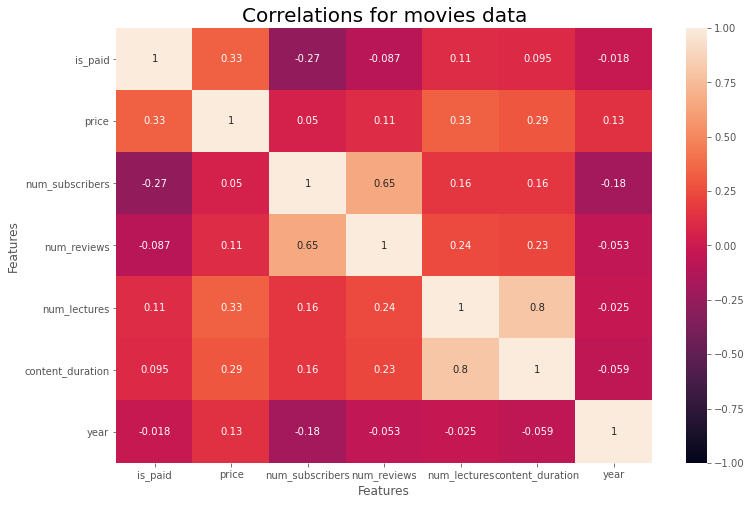

In [38]:
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Correlations for movies data', size=20)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

#### From the graph and the heatmap above, it's clear that 'content_duration' has no affect on the course price

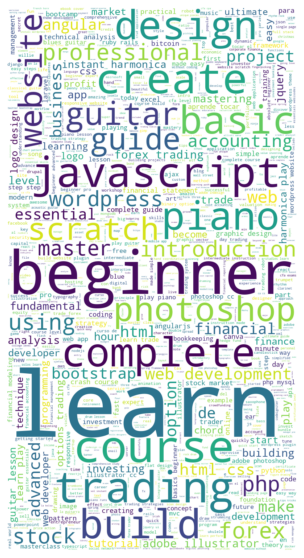

In [39]:
words = " ".join(df['course_title'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()